#  Red de comercio en la colonia Valle de Aragón

## Datos

Los nodos son negocios de comercio por mayoreo y menudeo, y los enlaces son la cercanía entre negocios. En principio quiero trabajar con una red conexa considerando de distancia física; se tomó el criterio de generearlos con 175 metros o menos. También quisiera explorar criticalidad variando la distancia en las que pueden ocurrir enlaces.

La obtención de los datos fue por medio de la [página del Inegi](https://www.inegi.org.mx/app/mapa/espacioydatos/default.aspx?ag=), poniendo en el buscador: colonia Valle de Aragón, cp 57100 y filtrando las actividades económicas de comercio por mayoreo y comercio por menudeo.

In [1]:
include("funciones.jl")

WebIO._IJuliaInit()

Graficas (generic function with 1 method)

In [2]:
colores = include("colores.jl")
coordenadas = datos[!,[5,6]]
M = distanciasEnlaces(coordenadas,175)
g = Graph(M)

{629, 17060} undirected simple Int64 graph

In [3]:
nodecolor = distinguishable_colors(75)
nodefillc = nodecolor[colores]

In [4]:
using Compose
import Cairo,Fontconfig

draw(PNG("redVA.png",15cm,15cm),gplot(g,
        coordenadas[:,1],coordenadas[:,2],
        nodefillc=nodefillc,
    )
)
draw(PDF("redVA.pdf", 15cm, 15cm),gplot(g,
        coordenadas[:,1],coordenadas[:,2],
        nodefillc=nodefillc,
    )
)

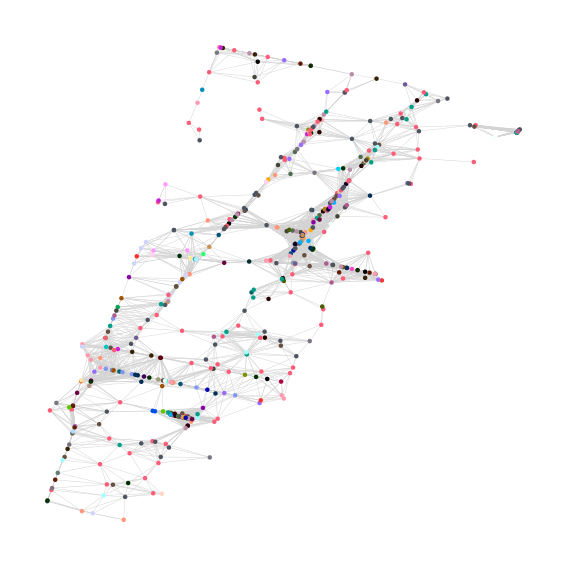

##  Propiedades de la red

* Propiedades generales: Número de nodos, número de enlaces, grado promedio, clustering promedio, diámetro o distancia promedio.

* Gráfica de dos medidas de centralidad de los nodos

* Imagen de un subconjunto de la red, visualizando medidas de centralidad

* Distribución de grado con la escala adecuada (lineal, log-log, log-lineal, etc.)

* Interpretación de las propiedades de la red a la luz del significado de los nodos y los enlaces.

### Propiedades generales de la red

In [5]:
N = nv(g)
L = g.ne
k = 2*L/N
C = global_clustering_coefficient(g)

p = k / (N-1)

println("número de nodos: ", N)
println("número de enlaces: ", L)
println("grado promedio: ",k)
println("clustering promedio: ", global_clustering_coefficient(g))
println("diámetro: ", diameter(g))
println("Distancia promedio más corta: ",distanciaPromedioMasCorta(g))

número de nodos: 629
número de enlaces: 17060
grado promedio: 54.24483306836248
clustering promedio: 0.9238503484474317
diámetro: 29
Distancia promedio más corta: 7.527639666643038


###  Medidas de centralidad

In [6]:
c_be = centriBe(g)
c_ei = centriEig(g)
nodecolor = [colorant"lightseagreen", colorant"magenta",  colorant"lime"]
nodefillc = nodecolor[c_be]
nodesize = c_ei

draw(PNG("BT-EIVA.png", 20cm, 20cm),gplot(g,
        coordenadas[:,1],coordenadas[:,2],
        nodefillc=nodefillc,
        nodesize=nodesize,
    )
)
draw(PDF("BT-EIVA.pdf", 100cm, 100cm),gplot(g,
        coordenadas[:,1],coordenadas[:,2],
        nodefillc=nodefillc,
        nodesize=nodesize,
        #nodelabel=1:629,
        #nodelabelangleoffset=π/2
    )
)

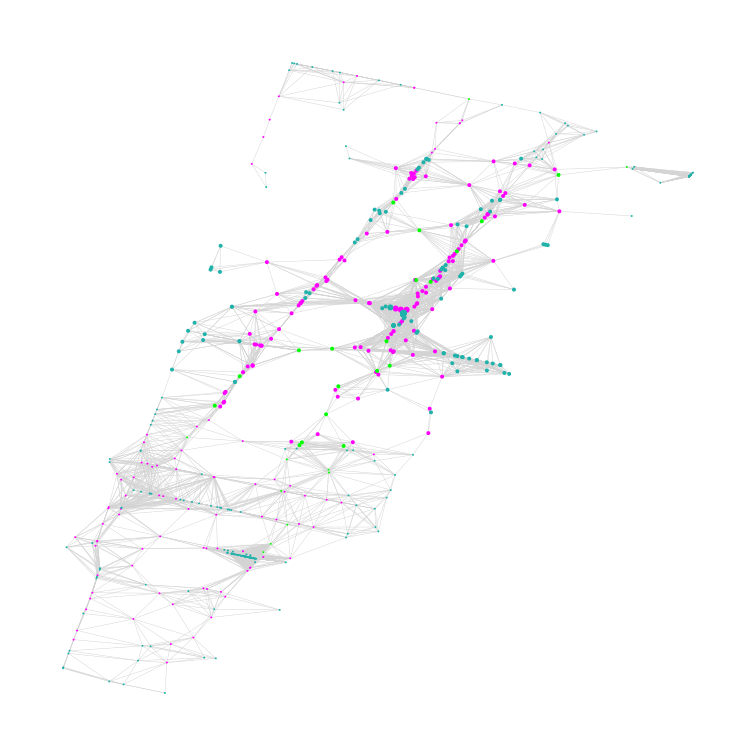

La centradidad de eigenvector se nota por el tamaño de los nodos mientras que la centralidad betweeness se expresa en colores, donde el verde representa mayor importancia seguido del magenta y al ultimo el azul.

###  Subconjunto de la red con medida de centralidad


In [7]:
arr=[1,35,209,34,210,64,21,44,70,6,7,8,5]
alphas = transparenciaSR(g,arr)
nodefillc = [RGBA(0.0,0.8,0.8,i) for i in alphas]

draw(PNG("subRed.png", 20cm, 20cm),gplot(g,
        coordenadas[:,1],coordenadas[:,2],
        nodefillc=nodefillc,
    )
)

draw(PDF("subRed.pdf", 100cm, 100cm),gplot(g,
        coordenadas[:,1],coordenadas[:,2],
        nodefillc=nodefillc,
        nodelabel = 1:629
    )
)

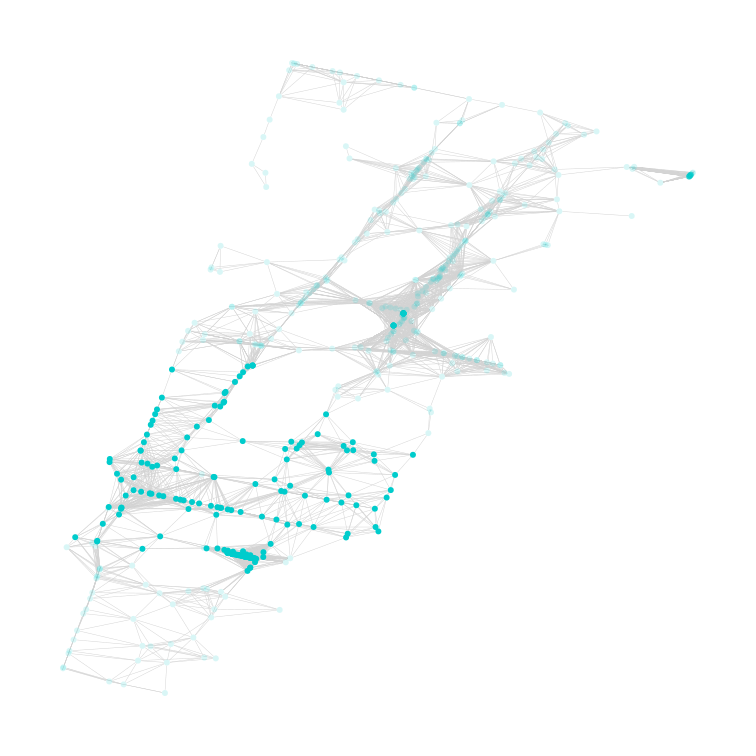

In [8]:
subg = subRed(g)

{629, 4130} undirected simple Int64 graph

In [9]:
include("funciones.jl")

Graficas (generic function with 1 method)

In [10]:
subnodecolor = [colorant"blue", colorant"lightseagreen", colorant"magenta",  colorant"lime"]
subc_be = SubcentriBe(subg)
subc_ei = SubcentriEig(subg)

subnodefillc = subnodecolor[subc_be]
subnodesize = subc_ei

draw(PNG("subRedEITB.png", 20cm, 20cm),gplot(g,
        coordenadas[:,1],coordenadas[:,2],
        nodefillc=subnodefillc,
        nodesize = subnodesize,
    )
)

draw(PDF("subRedEIBT.pdf", 100cm, 100cm),gplot(g,
        coordenadas[:,1],coordenadas[:,2],
        nodefillc=subnodefillc,
        nodesize=subnodesize,
        #nodelabel=1:629,
        #nodelabelangleoffset=π/2
    )
)

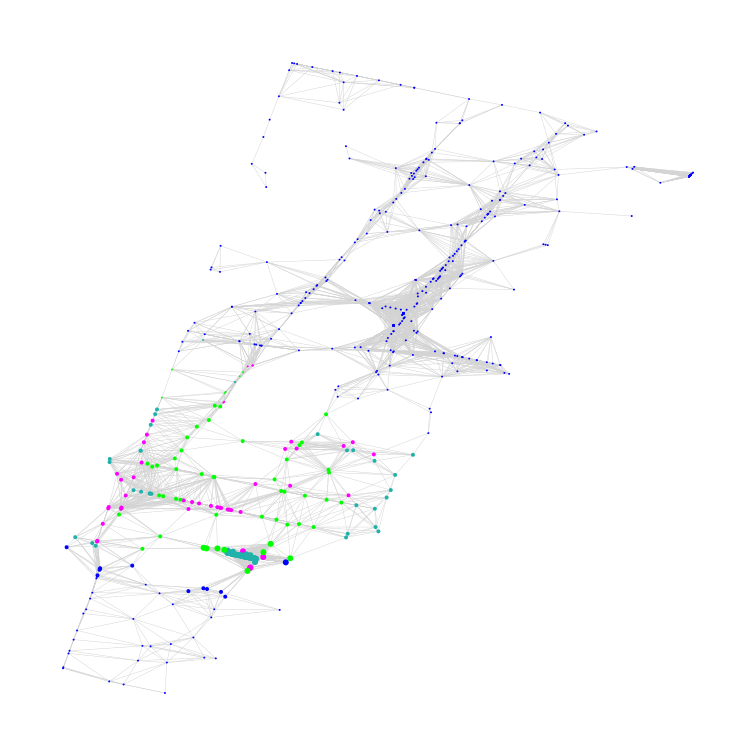

###  Distribución de grado

In [11]:
using PyCall
using Distributions
np = pyimport("numpy")

PyObject <module 'numpy' from '/home/rogve98/anaconda3/lib/python3.9/site-packages/numpy/__init__.py'>

In [12]:
grados = degree(g)
Max = maximum(grados)

150

In [13]:
y,x = np.histogram(grados,bins = 1:maximum(grados)+1)
#y = y./Max

([1, 5, 3, 10, 4, 8, 10, 12, 15, 14  …  3, 102, 7, 4, 2, 2, 2, 3, 1, 1], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  142, 143, 144, 145, 146, 147, 148, 149, 150, 151])

In [14]:
p1 = scatter(x[1:end-1],y./Max,yscale=:log10,xscale=:log10,
    yticks=[10^-3,10^-2,10^-1,10^0],
    label = "",
    title = "Distribución de grado escala log-log",
    ylim=[10^-3,1]
)

plot!(x[1:end-1],pdf.(Poisson(k),x[1:end-1]),w=2,label="Poisson")

p2 = histogram(grados,nbins=Max+1,label="",
    title = "Distribución de grado",
    normalize = true
)

plot(p1,p2,layout=(1, 2), size=(1000, 450),
     xlabel = "<k>",
)

##  Interpretación de las propiedades



Comenzando por las **propiedades generales de la red** tenemos $L=17\, 060$ enlaces conecatados a $N=629$ nodos bajo un criterio de distancia (física) entre establecimientos. Las longitudes fueron tomadas a partir de su geo-localización en términos de latitudes y longitudes, luego se estimó sus respectivas distancias euclidiana. En este caso, como el terreno de estudio no es tan grande como para que los efectos de curvatura de la tierra generen un impacto, se decidió por distancia euclidiana.

Cada distancia calculada estaría en unidades de grados longitud y latitud, para generar las distancias en metros se hace la conversión

$$
\begin{cases}
1^\circ&=111\, 111\ m\\
d^\circ &= x\ 
\end{cases}
$$

si y solo si

$$
x\ [m]=\frac{d^\circ\cdot 111\, 111\ m}{1^\circ}
$$

El criterio de distancia que se tomó para la existencia de enlaces es el siguiente; si la distancia es menor a 175 m (con base en la anterior conversión) entonces existe enlace entre nodos, en cualquier otro caso no existe. Se escogió esta distancia porque previamente se verificó que es la distancia para la que la red comienza a ser conectada, para distancias inferiores tendríamos redes disconexas en general. Esto es importante ya que podemos tener desde redes subcríticas, críticas, supercríticas y conectadas, lo cual nos abre la posibilidad de estudiar criticalidad.

Esta red con dicho numero de nodos tiene una capacidad de tener hasta $L_{\max}=\frac{N(N-1)}{2}=197\, 506$ enlaces y sin embargo, el régimen conectado se da a partir de 175 m, por lo que nuestra red tiene aproximadamente un décimo de los enlaces que podría soportar. Al tratarse de una red de comercio en la colonia Valle de Aragón (1a y 2a sec.), es de esperarse que exista cierta distribución que cubra las exigencias de la comunidad de mi colonia, desde las tiendas de abarrotes que hay en cada esquina, hasta tiendas más especializadas ubicadas en las avenidas principales. Por ello el grado promedio es alto, quiere decir que  cerca de un establecimiento, existen aproximadamente otros 54 en un perimetro de 175 m a la redonda. 

Sin embargo, como los establecimientos son diversos. Desde tlapalerías hasta tiendas de material de construcción, no podemos saber con exactitud si esos 13 establecimientos vecinos son de la misma categoría. Habría de checar dicha información directamente de la red de colores cotegada con una tabla informativa. Esto mismo nos lleva al coeficiente de clustering, es bastante alto para esta red pues es aproximadamente $\langle C\rangle\approx 0.92$. Esta información nos dice que que por cada 175m de la colonia, existe una gran cercanía (física) entre los diversos establecimientos. Sin embargo, como se puede ver en la red de colores (la primera), los clusters no se acumulan entre establecimientos, es decir, no se observan clusters de puras tiendas de abarrotes, o de tlapalerías etc, sino que los establecimientos estan distribuidos (espacialmente) casi de manera aleatoria.

Por último el diametro nos dice que la colonia mide aproximadamente $D=175\ m\cdot 29=5\, 075\ m$, mientras que la distancia promedio más corta es de aproximadamente $d=1\, 317\ m$. Ahora entrando a las medidas de centralidad general veamos el siguiente mapa para tener referencia geográfica


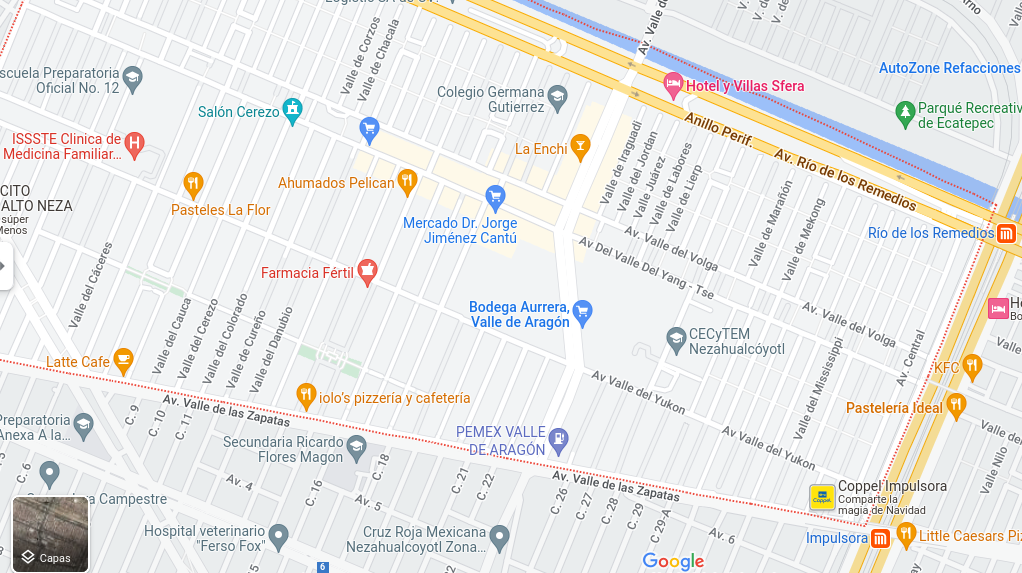

Las avenidas más concurridas son: Av. Del valle de Yang-Tse en primer lugar, seguido por la Av. Valle del Yukon y posteriormente la Av central (Carlos Hank González). Hablando de centralidad de eigenvector, su concentración se ubica en la primera avenida mencionada, donde su posición geográfica con respecto de otros establecimientos los hacen comercios muy conectados, con grado alto y con conexión a otros nodos importantes. También en la avenida del Yukon existen numerosos nodos con alta centralidad de eigenvactor, al ser la segunda avenida más concurrida es de esperarse que estén bien conectados a otros establecimientos a la redonda. En resumen, la centralidad de eigenvector nos muestra las avenidas con mayor cantidad de establecimientos y conexiones entre ellos. En el resto de las zonas de la colonia no existe tanta concurrencia de establecimientos como en dichas avenidas.

Hablando de la centralidad de betweenness se nota una mayor distribución, pues podemos hallar verdes o magentas en zonas donde la centralidad eigenvector no tiene tanta relevancia. Este tipo de centralidad vendría bien para poder evaluar en que zonas de la colonia es factible poner un negocio y de que tipo, pues existen varios establecimientos que parece que se encuentran aislados de los demás y por tanto podrían considerarse como un oasis para los consumidores de esa parte de la comunidad, pues al tener un único establecimiento de dicha índole solo irían a ese establecimiento a comprar. Por tanto, evaluando las zonas en donde no hay nodos puede ser factible hacer un análisis de mercado para ver si es posible o no poner un negocio.

Para el análisis de la sub red, escogí ver como son las medidas de centralidad antes mencionada pero para la zona de la avenida central. Podemos  ver como hay demasiados verdes y magentas que contemplan alto índice de centralidad de betwenness, y primordialmente se encuentran sobre la avenida central y algunos sobre Yukon. Lo que indica que la aventida central es un punto de conexión entre la primera sección y la segunda sección de la colonia de Valle de Aragón. Por otro lado, fijándonos en la centralidad de eigenvector, situada en valle de Oaxaca, tiene sentido que lo sea porque en ese lugar hay un mercado y funje como centro de abastecimiento de recursos para la segunda sección de la colonia Valle de Aragón.

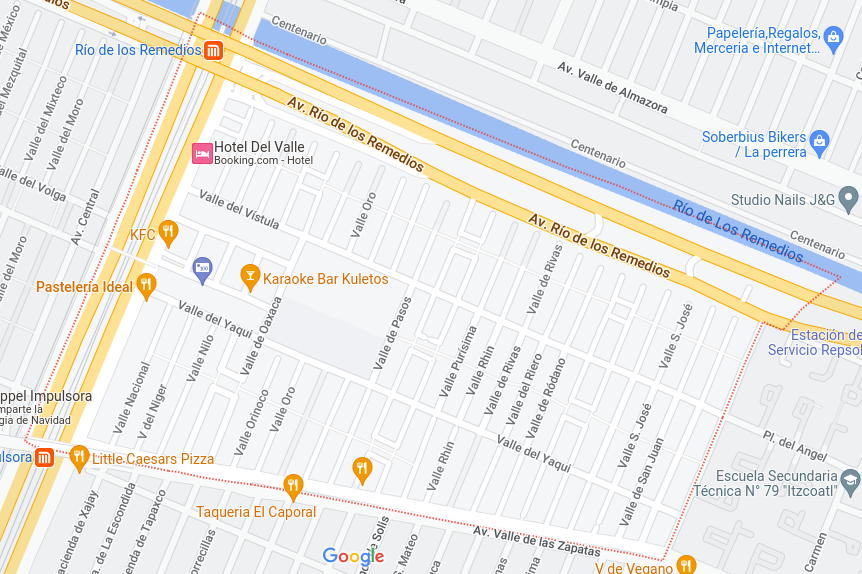

Hablando de la distribución de grado, no es como las distribuciones que hemos estado acostrumbrados a ver durante el curso, pues en la escala log log no tiene forma de cola larga y el histograma presenta cierta forma de binomial en la parte izquierda. Sorprendentemente existen 102 nodos con un grado de exactamente 142. Esto puede deberse a las avenidas y los mercados con alta frecuencia de establecimientos, que están cerca entre sí y que además comparten varios nodos entre sí. Podemos ver un adelanto en la distribución log log como no se ajusta a la distribución de poisson, sub estima los nodos con grado y alto grado.

En las siguiente sección compararemos esta distribución de grado con los modelos vistos en el curso y con ello iremos sacando conclusiones.

## Comparación con modelos

* Comparación de la distribución de grado con la red aleatoria correspondiente.

* Comparación del grado de la red con una red con independencia de escala: encontrar el exponente que mejor se ajusta y decir en qué región y graficar

* Interpretación de las comparaciones a partir del significado de los nodos y los enlaces

###  Distribución de grado con el modelo de red aleatoria

In [15]:
gAl = redAleatoria(629,p)

{629, 16827} undirected simple Int64 graph

In [16]:
gradosAl = degree(gAl)
maximum(gradosAl)

75

In [17]:
histogram(grados,nbins=Max+1,label="red Real",
    title = "Distribución de grado",
    normalize = true
)
histogram!(gradosAl,nbins=maximum(gradosAl)+1,label="red Aleatoria",
    normalize = true,
)
plot!(x[1:end-1],pdf.(Binomial(629,p),x[1:end-1]),w=2,label="Binomial")

Vemos como curiosamente lo que predice el modelo de red aleatoria es justamente el hueco que tiene nuestra red real. En la red real tenemos muchos nodos con grado bajo (parte izquierda del histograma azul), luego en la parte de la red aleatoria en realidad no tenemos  muchos nodos con ese grado, mientras que  existen muchos nodos con grado alto solo que específicamente de 142. En otras palabras, por un lado tenemos muchas clickas que son los nodos con grado "bajo", y por otro lado en las grandes avenidas se encuentran los nodos con mayor grado, pues son las mejores conectadas de la colonia.

### Distribución de grado con red con independencia de escala

In [18]:
powerlaw = pyimport("powerlaw")

PyObject <module 'powerlaw' from '/home/rogve98/anaconda3/lib/python3.9/site-packages/powerlaw.py'>

In [19]:
logBins = 10 .^range(0, stop = log10(Max+2), length = 50)

y0, x0 = np.histogram(grados,
                     bins = 1:maximum(grados) + 2,
                     density = true)

y1, x1 = np.histogram(grados,
                    bins = logBins,
                    density = true)

([0.014724895363986861, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03979767496290343, 0.0, 0.0, 0.0  …  0.0008102221013299293, 0.00048751210809651574, 0.0008800107593359648, 0.015090866001097459, 0.0, 0.0, 0.00029197677393214255, 0.0007905732953168555, 0.0, 0.014490047797599976], [1.0, 1.107968517258545, 1.2275942352360987, 1.3601357646096774, 1.5069876063849017, 1.6696948237732834, 1.8499692981703522, 2.0497077402676362, 2.2710116457976954, 2.516209405871361  …  60.408326765380075, 66.93052423630786, 74.15691369743912, 82.1635257138215, 91.03459975787712, 100.86347051296025, 111.75354986979546, 123.8194149476162, 137.18801358733074, 152.00000000000003])

In [20]:
#plot(x0[1:end-1],y0,size=(900, 450),label="",w=2)
scatter(x0[1:end-1],y0,size=(900, 450),label="Grados",markersize=2.5)

scatter!(x1[1:end-1],y1,
    yscale=:log10,xscale=:log10,
    yticks=[10^-3,10^-2,10^-1,10^0],
    label="Grados log",
    ylim=[10^-3,1]  ,
    title="Red con independencia de escala"
)

In [21]:
fit = powerlaw.Fit(grados)
fit.alpha

Calculating best minimal value for power law fit


249.62919793271175

In [22]:
scatter(x1[1:end-1],y1,
    yscale=:log10,xscale=:log10,
    yticks=[10^-6,10^-5,10^-4,10^-3,10^-2,10^-1,10^0],
    label="Grados log",
    size=(900, 450),
    ylim=[10^-4,1],
    title="Ley de potencias"
)
plot!(x1,0.5x1.^(-fit.alphas[7]),label="Ley de potencia: α ≈ 1.61")

###  Interpretación de las comparaciones

Como se ha mencionado anteriormente, la red de comercio que estamos analizando no se ajusta al modelo de red aleatoria, de hecho, curiosamente la zona en donde se acumula la distribución de grado dado por el modelo de red aleatoria; en la red real tiene un hueco en ese rango. Lo que nos dice este resultado es que primordialmente los nodos no son estadísticamente equivalentes, pues justo el hueco mencionado da muestra de ello. Por otro lado, tenemos numerosos nodos con grado bajo que no permitiría el modelo de red aleatoria y en el otro extremo, existe una gran cantidad de nodos con un grado de 142, lo cual puede deberse a las zonas concurridas como las avenidas Del Valle de Yang-Tse, Yukon o el propio mercado ubicado en la calle Valle de Oaxaca. Al ser establecimientos que se encuentran muy cerca, es un gran indicador de ser zonas altamente conectadas y con grados altos e iguales (pues estan muy cerca).

Para el caso del modelo de red con independencia de estala me ha sorprendido el resultado, pues la distribución de grado en escala log-log no muestra una distribución de cola larga como las que estuvimos acostumbrados durante el curso. Analizando dicha distribución pero con bins equiespaciados logarítmicamente, observamos una ligera tendencia decreciente propia de los comportamientos de redes con independencia de escala. Al tanteo, se determinó que la alpha que mejor se ajusta a la distribución es de aproximadamente 1.61, y entra dentro del rango permitido para observar criticalidad.



### (Extra) Criticalidad en la red

Me dio curiosidad por observar la transición de fase de la red que estamos analizando en función de las distancias físicas, donde podremos observar el régimen subcrítico, crítico, supercrítico y conectado. Durante el análisis que se ha hecho hasta ahora hemos trabajado con una versión conectada de la red, por practicidad más que nada aunque desde luego que se pueden modificar los criterios de acuerdo a lo que se quiera investigar.


In [23]:
include("funciones.jl")

Graficas (generic function with 1 method)

In [24]:
@time begin
    d,sol = tranFase()
end

  7.739953 seconds (181.09 M allocations: 2.920 GiB, 6.20% gc time, 1.46% compilation time)


(0:10:300, [1.0, 73.0, 116.0, 125.0, 160.0, 173.0, 198.0, 202.0, 254.0, 297.0  …  629.0, 629.0, 629.0, 629.0, 629.0, 629.0, 629.0, 629.0, 629.0, 629.0])

In [25]:
plot(d,sol,w=2,label="",
    ylabel = "|N|",
    xlabel = "d [m]",
    title = "Regímenes de la red en función de d"
    
)
scatter!(d,sol,label="")
vline!([170],color="deepskyblue",w=2,label="d = 170 m")
vline!([105],color="mediumslateblue",w=2,label="d = 105 m")
#savefig("transFase")

La gráfica resultante no es la que estamos acostrumbrados para procesos en transición de fase pero se asemeja al menos un poco. En esta gráfica al menos podemos encontrar régimen subcrítico en distancias inferiores a 105 metros, luego la transición de fase me atrevo a decir que ocurre en los 105 metros aproximadamente, donde entramos al régimen crítico y posteriormente al régimen subcrítico; en este régimen la red aún es disconexa. No será hasta los 170 metros que la red transita a ser completamente conectada.

##  Percolación y aleatorización de redes

Por tiempo nada más cubriré estos procesos en redes, pero me interesa mucho analizar que sucede con las caminatas aleatorias, pues creo que podría ser interesante.

### Aleatorizacion

Veremos si el coeficiente de clustering se preserva frebte a la aleatorización, en general que propiedades se preservan

In [26]:
#Coeficiente de clustering global de la red.
C

0.9238503484474317

In [27]:
include("funciones.jl")

Graficas (generic function with 1 method)

In [28]:
@time begin
    Plot , gc = Graficas(g)
end

 27.346597 seconds (3.78 M allocations: 7.555 GiB, 1.00% gc time, 3.79% compilation time)


(Plot{Plots.PlotlyJSBackend() n=8}, SimpleGraph{Int64}(17060, [[15, 165, 356, 362, 363, 367, 464, 499, 505, 545, 548, 610, 629], [3, 202, 255, 263, 271, 324, 343, 363, 369, 398  …  436, 438, 455, 536, 542, 545, 570, 584, 589, 622], [2, 102, 188, 196, 283, 309, 324, 328, 348, 369  …  522, 523, 540, 542, 575, 586, 601, 605, 610, 614], [118, 131, 133, 167, 183, 188, 308, 324, 336, 358  …  480, 487, 491, 539, 540, 552, 605, 615, 621, 623], [10, 213, 219, 251, 271, 361, 407, 449, 456, 474, 486, 489, 496, 505, 521, 522, 539, 548, 554, 621], [71, 92, 120, 142, 191, 231, 236, 263, 265, 294  …  349, 361, 461, 472, 504, 519, 525, 528, 533, 571], [94, 137, 193, 234, 277, 335, 426, 461, 477, 572, 574, 602, 612, 616], [26, 50, 63, 65, 79, 139, 140, 147, 156, 157  …  584, 588, 589, 608, 609, 610, 611, 613, 622, 623], [50, 65, 73, 81, 104, 113, 114, 128, 139, 156  …  586, 589, 590, 594, 596, 604, 608, 617, 625, 626], [5, 181, 189, 192, 219, 263, 273, 314, 375, 437, 438, 483, 512, 523, 535, 550]  …  [

In [29]:
Plot

La red aleatorizada resultante quedó como:

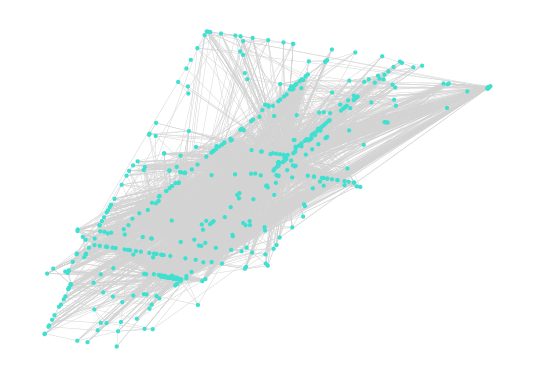

In [30]:
gplot(gc,coordenadas[:,1],coordenadas[:,2])

Podemos ver como este criterio nos quita la posibilidad de representar a los enlaces con el significado físico de distancia se pierde, esta red tiene otro sigificado que el que le habíamos dado sin embargo conserva el número de nodos y enlaces. Aquí los enlaces pueden medir desde 1 metro hasta 5000 metros, y no 175 metros como habíamos definido en un principio.

###  Percolación

NOTA: esta actividad si la hice enteramente en python porque ya no tuve tiempo de personalizarla a mi manera en este lenguaje. Por tanto únicamente presento las gráficas obtenidas del proceso de percolación y en la carpeta estaré poniendo los respectivos archivos .py para percolación y los .jl para el resto de funciones.

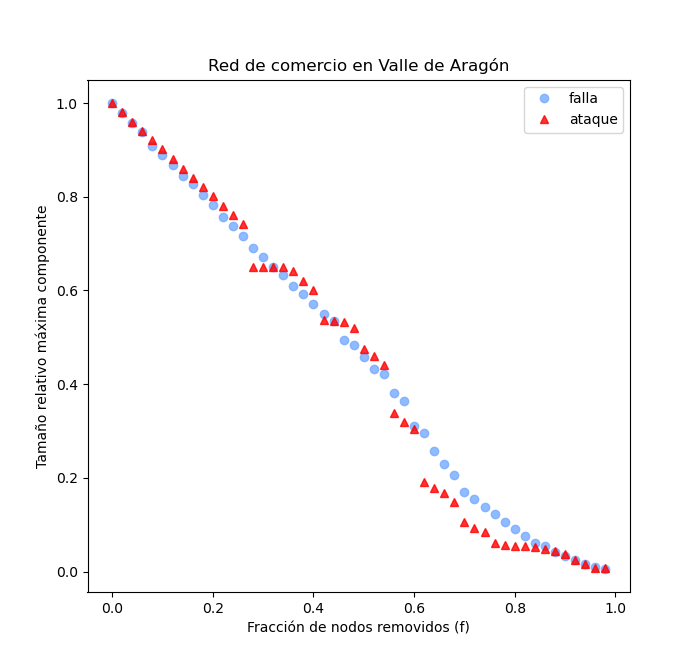

###  Interpretación de los procesos de redes

Para la parte de aleatorización se obtuvo una red con una misma distribución de grado (casi) y mismo número de enlaces pero las propiedades de la red si que se vieron modificadas, en ese sentido el coeficiente de clustering decreció bastante, eliminando las pequeñas clickas que habían en la colonia y homogenizando la red. En este sentido, la configuración de la red de comercio es un caso atípico que no es reproducible, sino que más bien sigue lealmente la distribución espacial que tiene. En el caso de los diametros y las distancias promedio más cortas vemos que decrecen conforme vamos aleatorizando, pero eso no implica que las distancias decrezcan sino que el criterio que se estableció de los 175  metros ya no se esta cumpliendo, existen enlaces que pueden medir desde 1 metro hasta 5000 metros. En otras palabras, el significado inicial de los enlaces se pierde a la hora de aleatorizar; lo mismo ocurre con el diámetro.

Para la parte de percolación tenemos algo inusual, observamos que la red que analizamos es robusta, pues aún mantiene su consistencia cuando se le quitan nodos con alto grado. En la parte de ataque se puede ver como decrece casi de la misma forma que en la falla.

##  Conclusiones

De todos los elementos reunidos en este proyecto podemos obtener una gran conclusión, las redes reales en donde participan de alguna forma los individuos de una sociedad, son robustas. Tienen un coeficiente alto de clustering y al mismo tiempo un grado promedio alto, del orden de decenas (en función del tamaño de la red). Cuando hablamos de la robustez de las redes, nos referimos a que varios nodos pueden ser eliminados y la red aún existiría; eso se vio directamente en el proceso de percolación

El método de aleatorización no es un proceso factible para analizar por que la configuración de cada enlace sigue un criterio específico que si se modifica de manera aleatoria, pierde su significado. Quizás se pueda ajustar la aleatorización para que siga el criterio de los enlaces pero es algo de lo que ya no me dio tiempo trabajar.

Algo interesante de ver serían las caminatas aleatorias para observar los diversos tiempos de recorrido que se pueden obtener, pero por la misma falta de tiempo ya no pude implementar.